In [1]:
# Telcom Customer Churn

# Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.

# customerID : Customer ID
# gender : Whether the customer is a male or a female
# SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
# Partner : Whether the customer has a partner or not (Yes, No)
# Dependents : Whether the customer has dependents or not (Yes, No)
# tenure : Number of months the customer has stayed with the company
# PhoneService : Whether the customer has a phone service or not (Yes, No)
# MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
# InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
# OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
# OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
# DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
# TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
# StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
# StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
# Contract : The contract term of the customer (Month-to-month, One year, Two year)
# PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
# PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
# MonthlyCharges : The amount charged to the customer monthly
# TotalCharges : The total amount charged to the customer
# Churn : Whether the customer churned or not (Yes or No)

In [2]:
import warnings
import numpy as np
import pandas as pd
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Importing preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate
#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
warnings.simplefilter(action='ignore', category=FutureWarning)
# 1) project title 
# 2) objectives (motivation)
# 3) data collection/crawling/acquisition
# 4) data preprocessing & descriptive analytics 
# 5) data modelling & predictive analytics, 
# 6) evaluation (modelling criteria) - grid search, ensemble, CV etc
# 7) data/business insights (diagnostics and prescriptive) - aka , how to achieve your goals/objectives
# 8) conclusion & deployment (post to github)

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
#Handle missing data (TotalCharges having 11 blanks, 0.15%)
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)
df = df.dropna()
#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

                  Total   Percent
TotalCharges         11  0.156183
Churn                 0  0.000000
OnlineSecurity        0  0.000000
gender                0  0.000000
SeniorCitizen         0  0.000000
Partner               0  0.000000
Dependents            0  0.000000
tenure                0  0.000000
PhoneService          0  0.000000
MultipleLines         0  0.000000
InternetService       0  0.000000
OnlineBackup          0  0.000000
DeviceProtection      0  0.000000
TechSupport           0  0.000000
StreamingTV           0  0.000000
StreamingMovies       0  0.000000
Contract              0  0.000000
PaperlessBilling      0  0.000000
PaymentMethod         0  0.000000
MonthlyCharges        0  0.000000
customerID            0  0.000000


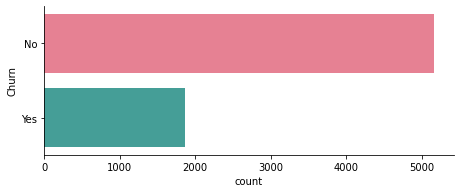

In [7]:
#Target Label (We will handle using SMOTE)
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h',palette="husl")

In [8]:
print("CUSTOMERS CHURN(%):")
print(round(df['Churn'].value_counts(normalize=True) * 100,1))


CUSTOMERS CHURN(%):
No     73.4
Yes    26.6
Name: Churn, dtype: float64


Text(0, 0.5, 'Revenue')

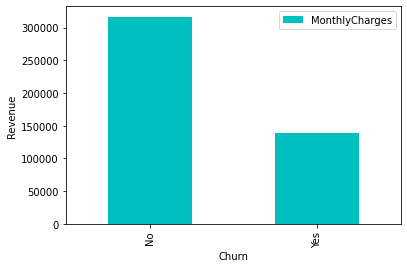

In [9]:
revenue = pd.DataFrame(df.groupby('Churn')['MonthlyCharges'].sum())
bx =revenue.plot.bar(color=['c','r'])
bx.set_ylabel('Revenue')

In [10]:
print("CUSTOMER CHURN REVENUE LOSS(%): ")
print(round(round(df.groupby('Churn')['MonthlyCharges'].sum()/df.groupby('Churn')['MonthlyCharges'].sum().sum() * 100),2))

CUSTOMER CHURN REVENUE LOSS(%): 
Churn
No     69.0
Yes    31.0
Name: MonthlyCharges, dtype: float64


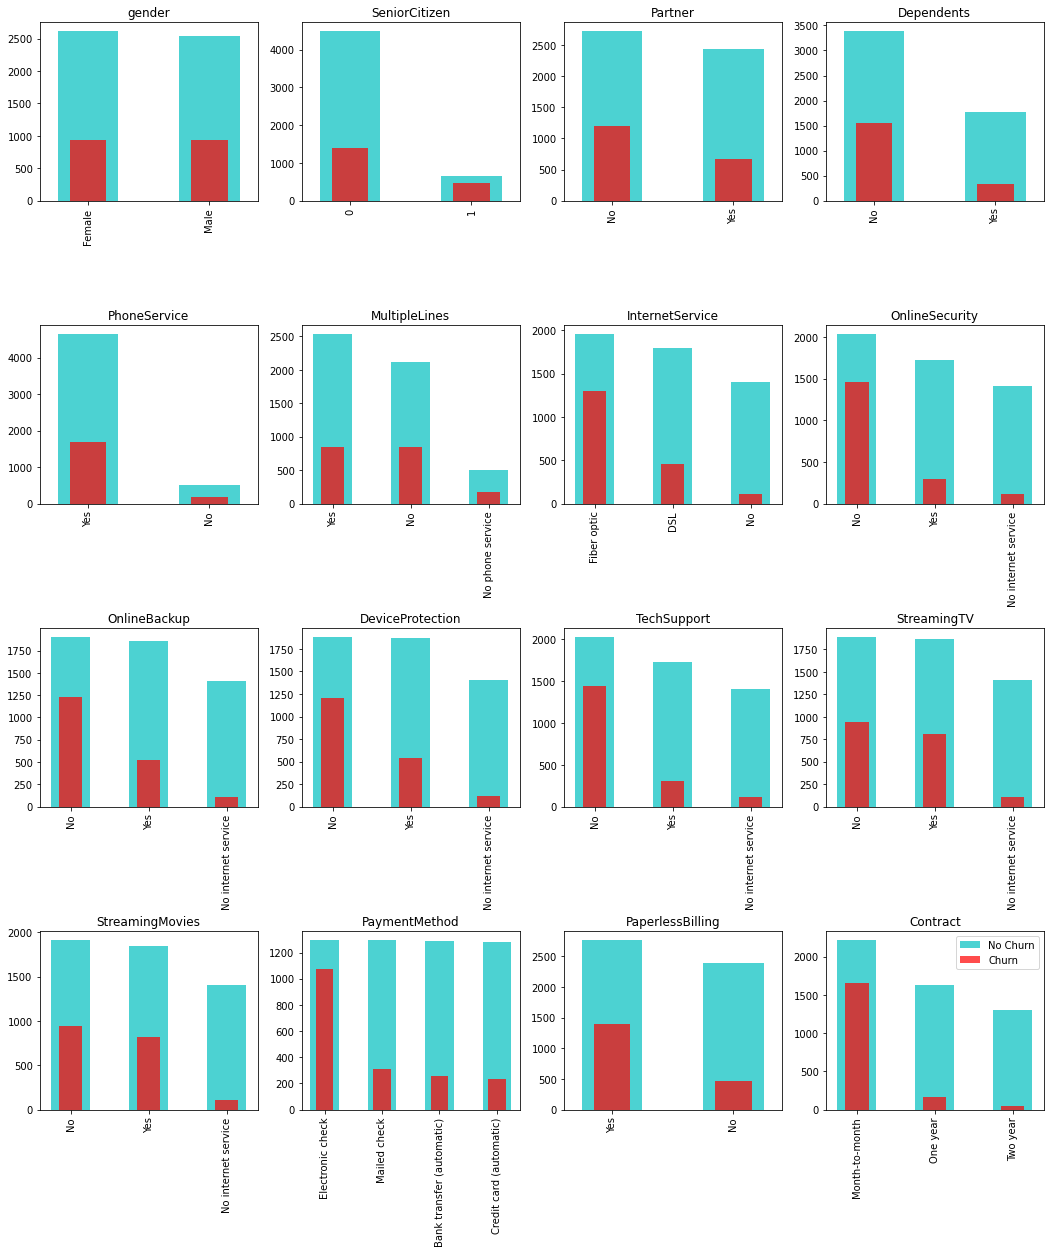

In [11]:
#Categorical Features
categorical_features = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaymentMethod',
 'PaperlessBilling',
 'Contract' ]

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[df.Churn=='No'][categorical_feature].value_counts().plot(kind='bar', 
                width=.5, ax=ax[row, col],color='c', alpha=0.7).set_title(categorical_feature)
    df[df.Churn=='Yes'][categorical_feature].value_counts().plot(kind='bar', 
                width=.3, ax=ax[row, col],color='r', alpha=0.7).set_title(categorical_feature)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.7)



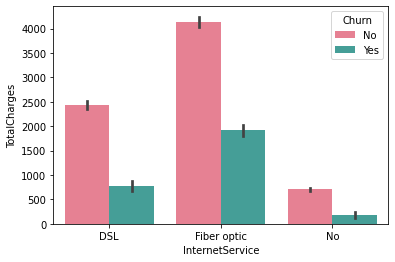

In [12]:
sns.barplot(x="InternetService", y="TotalCharges", hue='Churn',palette="husl", data=df);

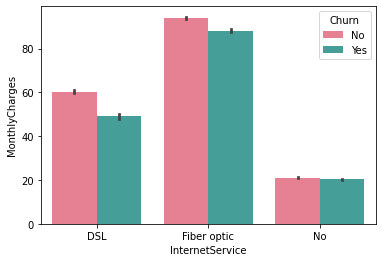

In [13]:
sns.barplot(x="InternetService", y="MonthlyCharges", hue='Churn',palette="husl", data=df);

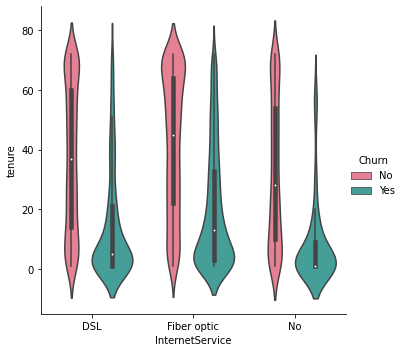

In [14]:
sns.catplot(x="InternetService", y="tenure", hue="Churn",palette="husl", kind="violin", data=df)

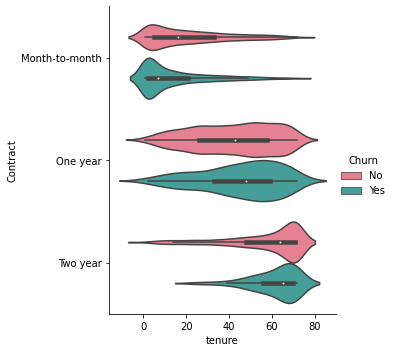

In [15]:
sns.catplot(x="tenure", y="Contract", hue="Churn",palette="husl", kind="violin", data=df)

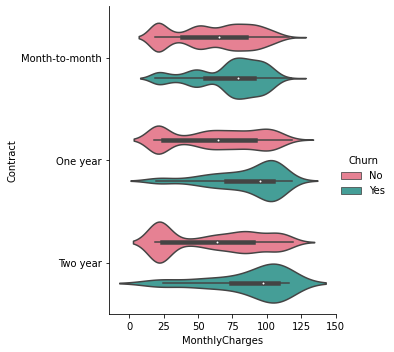

In [16]:
sns.catplot(x="MonthlyCharges",palette="husl", y="Contract", hue="Churn", kind="violin", data=df)

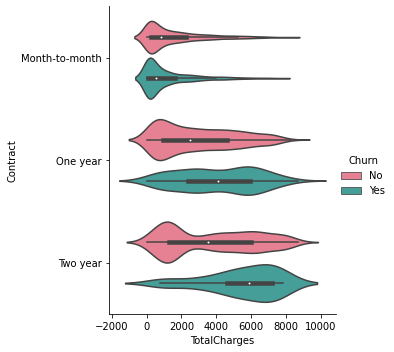

In [17]:
sns.catplot(x="TotalCharges",palette="husl", y="Contract", hue="Churn", kind="violin", data=df)

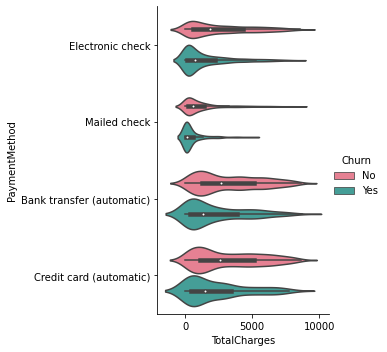

In [18]:
sns.catplot(x="TotalCharges",palette="husl", y="PaymentMethod", hue="Churn", kind="violin", data=df)

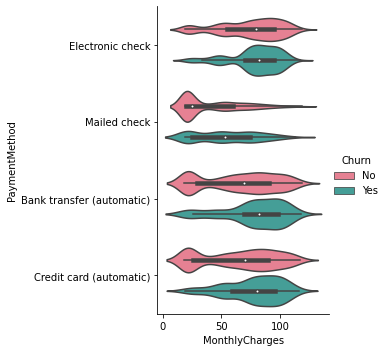

In [19]:
sns.catplot(x="MonthlyCharges",palette="husl", y="PaymentMethod", hue="Churn", kind="violin", data=df)

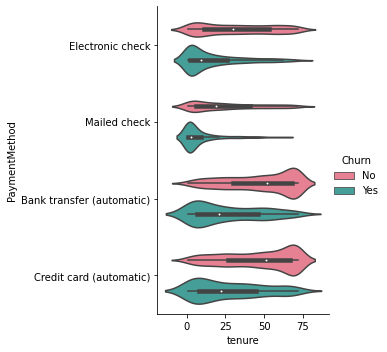

In [20]:
sns.catplot(x="tenure",palette="husl", y="PaymentMethod", hue="Churn", kind="violin", data=df)

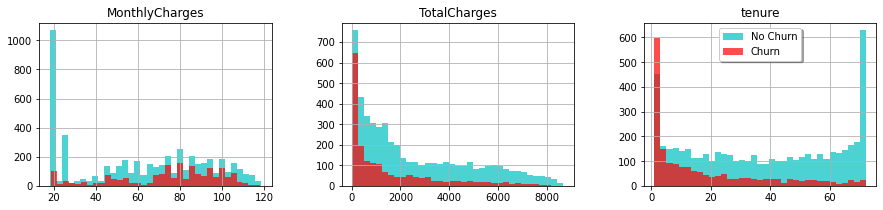

In [21]:
#Numerical Features
num_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[df.Churn == "No"][num_cols].hist(bins=35,color='c', alpha=0.7, ax=ax)
df[df.Churn == "Yes"][num_cols].hist(bins=35,color='r', alpha=0.7, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)




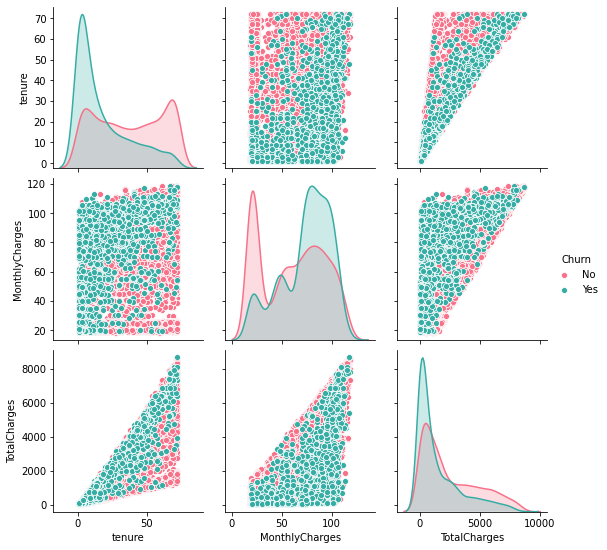

In [22]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], 
             hue='Churn', palette="husl")

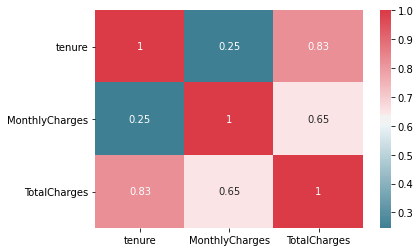

In [23]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(),annot=True,cmap = sns.diverging_palette(220, 10, as_cmap=True))

In [24]:
df.drop(['customerID'], axis=1, inplace=True)

In [25]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
df = pd.get_dummies(df, columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first = True)

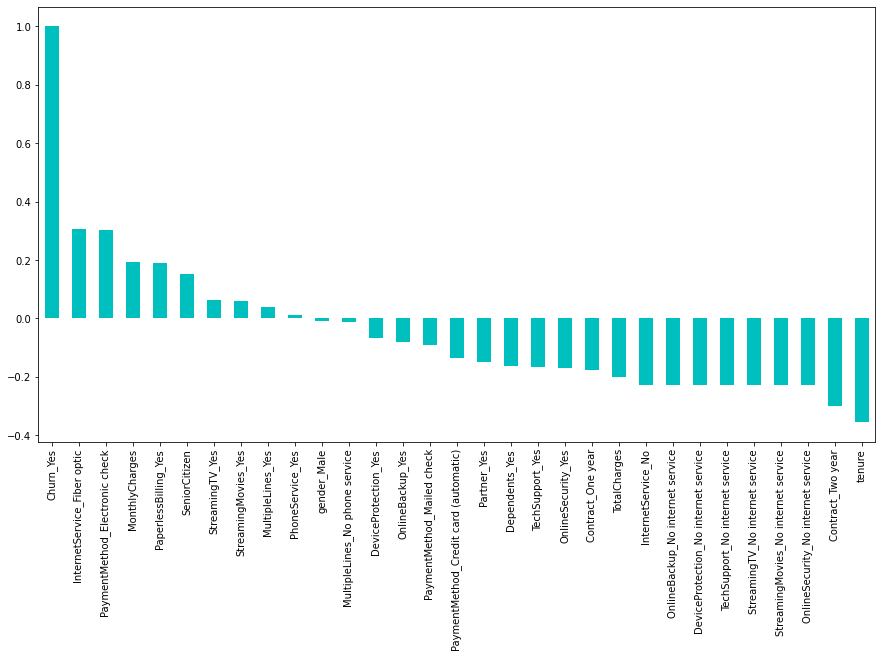

In [26]:
plt.figure(figsize=(15,8))
df.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar',color='c')

In [27]:
df["Churn_Yes"] = df["Churn_Yes"].astype(float)
y = df['Churn_Yes'].values
X = df.drop(labels = ['Churn_Yes'],axis = 1)

# Scaling all the variables to a range of 0 to 1

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0.0: 3614, 1.0: 1308})


In [29]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) 


In [30]:
from collections import Counter
counter = Counter(y_train_res)
print(counter)

Counter({1.0: 3614, 0.0: 3614})


In [31]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train) 

In [32]:
from collections import Counter
counter = Counter(y_train_miss)
print(counter)

Counter({0.0: 1308, 1.0: 1308})


In [33]:
model = XGBClassifier(n_estimators =100, max_depth=3, random_state=42)
model.fit(X_train_res, y_train_res.ravel())
clf_score = cross_val_score(model, X_train_res, y_train_res, cv=10)
print(clf_score)

print(clf_score.mean())
print(model.score(X_test, y_test))
y_pred_res=model.predict(X_test)
print('Confusion Matrix(XGB):')
print(confusion_matrix(y_test,y_pred_res))
print('Classification Report(XGB):')
print(classification_report(y_test,y_pred_res))

[0.73305671 0.72614108 0.7593361  0.80497925 0.90041494 0.90594744
 0.90041494 0.91009682 0.90581717 0.91828255]
0.8464486998233737
0.7848341232227488
Confusion Matrix(XGB):
[[1291  258]
 [ 196  365]]
Classification Report(XGB):
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1549
         1.0       0.59      0.65      0.62       561

    accuracy                           0.78      2110
   macro avg       0.73      0.74      0.73      2110
weighted avg       0.79      0.78      0.79      2110



           0                         Feature
25  0.226924               Contract_Two year
11  0.178739              InternetService_No
10  0.130608     InternetService_Fiber optic
24  0.100368               Contract_One year
6   0.031869                  Dependents_Yes
13  0.030760              OnlineSecurity_Yes
9   0.027393               MultipleLines_Yes
1   0.025749                          tenure
28  0.024206  PaymentMethod_Electronic check
0   0.023774                   SeniorCitizen


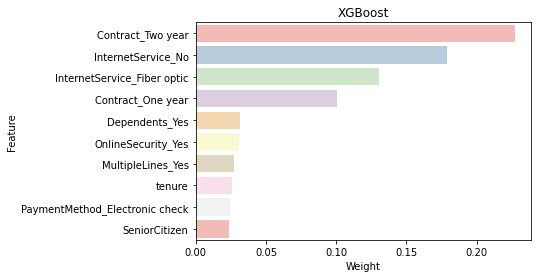

In [34]:
a = pd.DataFrame(model.feature_importances_)
a["Feature"] = list(X_train) 
print(a.sort_values(by=0, ascending=False).head(10))
g = sns.barplot(0,"Feature",data = a.sort_values(by=0, ascending=False)[0:10], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("XGBoost")

In [35]:
model = ExtraTreesClassifier(n_estimators =100, max_depth=3, random_state=42)
model.fit(X_train_res, y_train_res.ravel())
clf_score = cross_val_score(model, X_train_res, y_train_res, cv=10)
print(clf_score)
print(clf_score.mean())
print(model.score(X_test, y_test))
y_pred_res=model.predict(X_test)
print('Confusion Matrix(ET):')
print(confusion_matrix(y_test,y_pred_res))
print('Classification Report(ET):')
print(classification_report(y_test,y_pred_res))

[0.76901798 0.76071923 0.76348548 0.76763485 0.75656985 0.78146611
 0.7593361  0.77316736 0.78531856 0.78808864]
0.7704804159339165
0.7090047393364929
Confusion Matrix(ET):
[[1031  518]
 [  96  465]]
Classification Report(ET):
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77      1549
         1.0       0.47      0.83      0.60       561

    accuracy                           0.71      2110
   macro avg       0.69      0.75      0.69      2110
weighted avg       0.80      0.71      0.73      2110



           0                             Feature
25  0.196926                   Contract_Two year
1   0.137434                              tenure
10  0.128955         InternetService_Fiber optic
28  0.074088      PaymentMethod_Electronic check
13  0.056452                  OnlineSecurity_Yes
18  0.053189     TechSupport_No internet service
24  0.051582                   Contract_One year
12  0.046611  OnlineSecurity_No internet service
11  0.042414                  InternetService_No
19  0.040047                     TechSupport_Yes


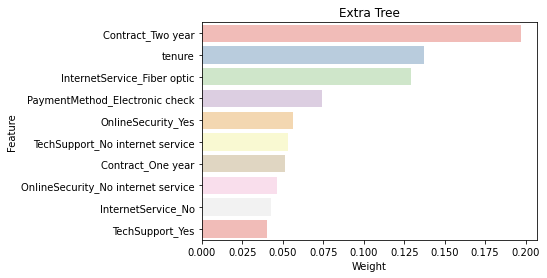

In [36]:
a = pd.DataFrame(model.feature_importances_)
a["Feature"] = list(X_train) 
print(a.sort_values(by=0, ascending=False).head(10))
g = sns.barplot(0,"Feature",data = a.sort_values(by=0, ascending=False)[0:10], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Extra Tree")

In [37]:
from pprint import pprint
model = RandomForestClassifier(n_estimators =100, max_depth=3, random_state=42)
model.fit(X_train_res, y_train_res.ravel())
clf_score = cross_val_score(model, X_train_res, y_train_res, cv=10)
print(clf_score)
print(clf_score.mean())
print(model.score(X_test, y_test))
y_pred_res=model.predict(X_test)
print('Confusion Matrix(RF):')
print(confusion_matrix(y_test,y_pred_res))
print('Classification Report(RF):')
print(classification_report(y_test,y_pred_res))
# print('Parameters currently in use:\n')
# pprint(model.get_params())

[0.76901798 0.75103734 0.76348548 0.79114799 0.78146611 0.79806362
 0.78976487 0.78699862 0.80886427 0.80609418]
0.7845940468117225
0.7350710900473933
Confusion Matrix(RF):
[[1106  443]
 [ 116  445]]
Classification Report(RF):
              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1549
         1.0       0.50      0.79      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110



           0                               Feature
1   0.183663                                tenure
25  0.163717                     Contract_Two year
10  0.088794           InternetService_Fiber optic
28  0.082915        PaymentMethod_Electronic check
24  0.064514                     Contract_One year
13  0.056915                    OnlineSecurity_Yes
3   0.048099                          TotalCharges
2   0.045390                        MonthlyCharges
16  0.038207  DeviceProtection_No internet service
18  0.035409       TechSupport_No internet service


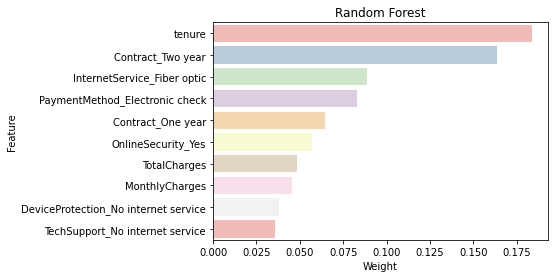

In [38]:
a = pd.DataFrame(model.feature_importances_)
a["Feature"] = list(X_train) 
print(a.sort_values(by=0, ascending=False).head(10))
g = sns.barplot(0,"Feature",data = a.sort_values(by=0, ascending=False)[0:10], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

LogReg: 0.802110 (+/- 0.021873)
XGBClassifier: 0.791747 (+/- 0.015554)
KNN: 0.765741 (+/- 0.022263)
DecisionTreeClassifier: 0.741968 (+/- 0.019987)
RandomForestClassifier: 0.796628 (+/- 0.015975)
GradientBoostingClassifier: 0.803537 (+/- 0.014160)
RidgeClassifier: 0.799469 (+/- 0.019508)
BaggingRidgeClassifier: 0.779559 (+/- 0.009708)
ExtraTreesClassifier: 0.779968 (+/- 0.019971)
SVM: 0.800081 (+/- 0.015064)
Naive Bayes: 0.673090 (+/- 0.022108)
AdaBoostClassifier: 0.800486 (+/- 0.019958)


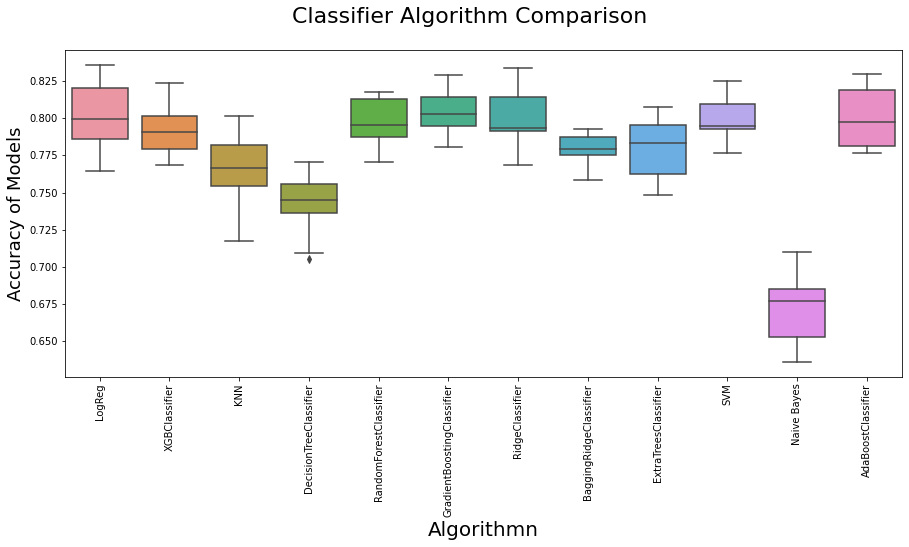

In [42]:
clfs = []
seed = 42

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier())]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))
clfs.append(("SVM",
             Pipeline([("Scaler", StandardScaler()),
                       ("SVM", SVC())])))
clfs.append(("Naive Bayes",
             Pipeline([("Scaler", StandardScaler()),
                       ("Naive Bayes", GaussianNB())])))
clfs.append(("AdaBoostClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("AdaBoost", AdaBoostClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

LogReg: 0.763150 (+/- 0.033280)
XGBClassifier: 0.846328 (+/- 0.087273)
KNN: 0.789745 (+/- 0.095847)
DecisionTreeClassifier: 0.781564 (+/- 0.053629)
RandomForestClassifier: 0.854343 (+/- 0.066540)
GradientBoostingClassifier: 0.838160 (+/- 0.076338)
RidgeClassifier: 0.762322 (+/- 0.035271)
BaggingRidgeClassifier: 0.821679 (+/- 0.040746)
ExtraTreesClassifier: 0.869561 (+/- 0.063383)


/Users/tungfuwei/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


SVM: 0.796501 (+/- 0.045445)
Naive Bayes: 0.747822 (+/- 0.089842)
AdaBoostClassifier: 0.799271 (+/- 0.057982)


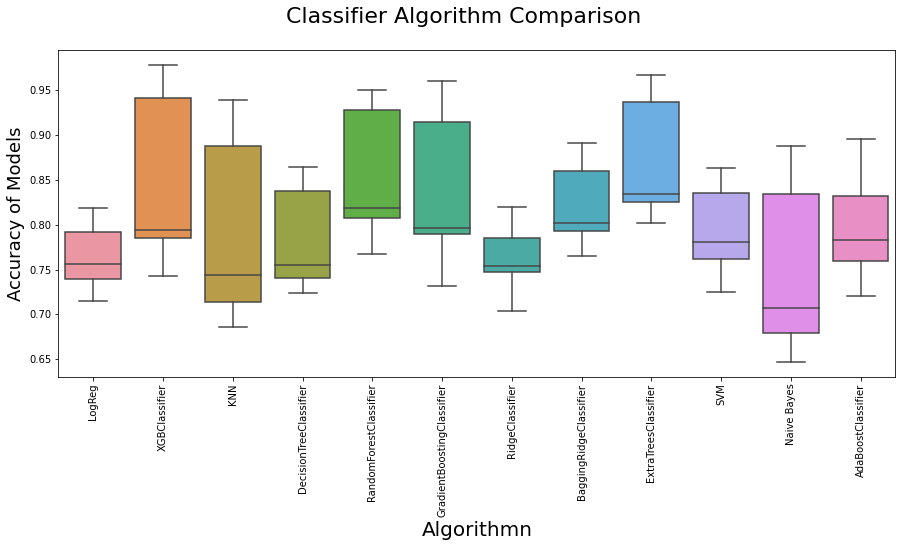

In [43]:
clfs_smote = []
seed = 42

clfs_smote.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs_smote.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs_smote.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs_smote.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs_smote.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs_smote.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier())])))  

clfs_smote.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs_smote.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs_smote.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))
clfs_smote.append(("SVM",
             Pipeline([("Scaler", StandardScaler()),
                       ("SVM", SVC())])))
clfs_smote.append(("Naive Bayes",
             Pipeline([("Scaler", StandardScaler()),
                       ("Naive Bayes", GaussianNB())])))
clfs_smote.append(("AdaBoostClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("AdaBoost", AdaBoostClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs_smote:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_res, y_train_res, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)
    

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

LogReg: 0.590746 (+/- 0.099067)
XGBClassifier: 0.574626 (+/- 0.096171)
KNN: 0.513467 (+/- 0.163724)
DecisionTreeClassifier: 0.542100 (+/- 0.091118)
RandomForestClassifier: 0.545592 (+/- 0.116428)
GradientBoostingClassifier: 0.576593 (+/- 0.099045)
RidgeClassifier: 0.581962 (+/- 0.104822)
BaggingRidgeClassifier: 0.551227 (+/- 0.054330)
ExtraTreesClassifier: 0.516194 (+/- 0.161601)
SVM: 0.535775 (+/- 0.179791)
Naive Bayes: 0.661703 (+/- 0.258411)
AdaBoostClassifier: 0.591890 (+/- 0.110285)


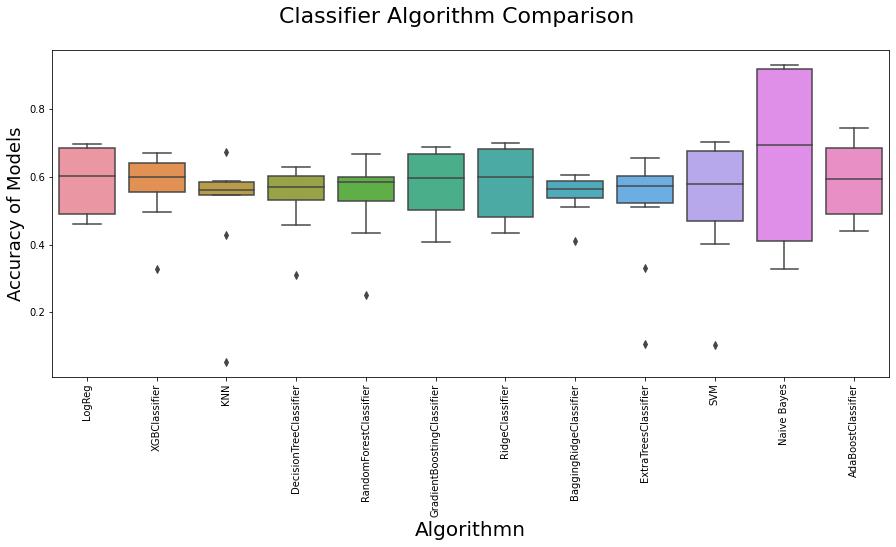

In [44]:
clfs_nr = []
seed = 42

clfs_nr.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs_nr.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs_nr.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs_nr.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs_nr.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs_nr.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier())]))) 

clfs_nr.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs_nr.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs_nr.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))
clfs_nr.append(("SVM",
             Pipeline([("Scaler", StandardScaler()),
                       ("SVM", SVC())])))
clfs_nr.append(("Naive Bayes",
             Pipeline([("Scaler", StandardScaler()),
                       ("Naive Bayes", GaussianNB())])))
clfs_nr.append(("AdaBoostClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("AdaBoost", AdaBoostClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs_nr:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_miss, y_train_miss, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()